# Velas class

The Velas class provides a basic interface to interact with the OCHLV candlesticks from Technical Analysis data. An object of this class contains the candlestick data for a given symbol and timeframe in a pandas dataframe; and implements a set of functionalities:
<ul>   
    <li> Loading and saving the raw candlestick data from different sources (CSV, SQL..).</li>
    <li> Handling the data updating, missing data, separating trading sessions...</li>
    <li> Technical Analysis indicators: returns, MAs, oscillators...</li>
    <li> Common plots.</li>
</ul>    

[TOC]

### Import libraries

For running the code in this notebook, we need to execute the following imports:
- We import the needed standard libraries first (datetime, pandas...).
- Then we add the path of the directory above (main traphing folder) to the system path. This is done so that when import the traphing library, it will load the local version in the folder, instead of the version installed with pip. 
- Finally we load the traphing classes, functions and enums from the library.

In [1]:
import datetime as dt
import pandas as pd
from IPython.display import Image
%matplotlib qt

In [2]:
import sys
sys.path.append("..") # Adds higher directory to python modules path.

In [3]:
from traphing.data_classes import Velas
from traphing.utils import Timeframes, unwrap, MarketHours
from traphing.graph.Gl import gl

## Creating a Velas instance
When we create a Velas object, we need to specify the basic parameters of the candlestick data:
 - <b>symbol_name</b>: The name of the symbol given by the broker we are using (it can be different from broker to broker).
 -  <b>timeframe</b>: The timeframe of the candlesticks, i.e. M5, M15, D1... (using an Enum).

No candlestick data is loaded when creating the object but its empty pandas DataFrame is created.

In [4]:
symbol_name = "AUDCHF"
timeframe = Timeframes.M15

velas = Velas(symbol_name, timeframe)
print (type(velas))

<class 'traphing.data_classes._Velas._Velas.Velas'>


In [5]:
velas.df

,Open,High,Low,Close,Volume
Timestamp,,,,,


## Loading candlestick data

The candlestick data can be provided from different sources:
 - Pandas dataframe.
 - CSV files.
 - SQL database.
 
No matter what the source of the data is, the candlesticks are stored within the Velas object as rows in a pandas DataFrame, which has the timestamp of the candlesticks as index.

### From CSV

The CSV files that are loaded/saved using the Velas in-built functions follow the following naming convention:
Given a root folder storage_folder, the data for a given symbol_name and timeframe is stored in expected to be located and will be saved to the path:
- {storage_folder}/{timedrame}/{symbol_name}_{timeframe}.csv

In [6]:
storage_folder = "../tests/data/storage/"
velas.load_data_from_csv(storage_folder)

Size ../tests/data/storage/M15/AUDCHF_M15.csv:  100400  rows


## Pandas DataFrame data
Once the data has been populated loaded we can access the basic information through the attributes:
- df: The pandas DataFrame
- timestamps: The index of the pandas DataFrame

The timstamo is obtained from the index of the pandas dataframe. 
The time

In [7]:
velas.df

,Open,High,Low,Close,Volume
Timestamp,,,,,
2015-08-14 23:45:00,0.71976,0.72021,0.71930,0.71937,592.0
2015-08-17 00:00:00,0.71934,0.72001,0.71934,0.71991,56.0
2015-08-17 00:15:00,0.71992,0.72003,0.71867,0.71999,181.0
2015-08-17 00:30:00,0.71999,0.72034,0.71966,0.71983,124.0
2015-08-17 00:45:00,0.71985,0.72025,0.71975,0.71978,81.0
...,...,...,...,...,...
2019-08-30 19:45:00,0.66637,0.66637,0.66599,0.66606,521.0
2019-08-30 20:00:00,0.66606,0.66615,0.66581,0.66592,825.0
2019-08-30 20:15:00,0.66591,0.66628,0.66579,0.66597,961.0


In [8]:
velas.timestamps

DatetimeIndex(['2015-08-14 23:45:00', '2015-08-17 00:00:00',
               '2015-08-17 00:15:00', '2015-08-17 00:30:00',
               '2015-08-17 00:45:00', '2015-08-17 01:00:00',
               '2015-08-17 01:15:00', '2015-08-17 01:30:00',
               '2015-08-17 01:45:00', '2015-08-17 02:00:00',
               ...
               '2019-08-30 18:30:00', '2019-08-30 18:45:00',
               '2019-08-30 19:00:00', '2019-08-30 19:15:00',
               '2019-08-30 19:30:00', '2019-08-30 19:45:00',
               '2019-08-30 20:00:00', '2019-08-30 20:15:00',
               '2019-08-30 20:30:00', '2019-08-30 20:45:00'],
              dtype='datetime64[ns]', name='Timestamp', length=100400, freq=None)

In [9]:
velas.dates

Index([2015-08-14, 2015-08-17, 2015-08-17, 2015-08-17, 2015-08-17, 2015-08-17,
       2015-08-17, 2015-08-17, 2015-08-17, 2015-08-17,
       ...
       2019-08-30, 2019-08-30, 2019-08-30, 2019-08-30, 2019-08-30, 2019-08-30,
       2019-08-30, 2019-08-30, 2019-08-30, 2019-08-30],
      dtype='object', name='Timestamp', length=100400)

### Specifying a time interval

When we load the candlestick data, any operation performed over the object will be applied to all of its samples (rows in the DataFrame). If we just want to work with a subset of the candlesticks, we can specify a time interval with the set_time_interval(). Its parameters are:
- <b>start_time</b>: datetime object with the starting date.
- <b>end_time</b>: datetime object with the end date.
- <b>trim</b>: If true, it will remove all rows outside of the time interval. Otherwise it will create an internal binary mask which will be internally used when accessing df and dates to filter.

Both dates are included in the interval.

In [10]:
start_time = dt.datetime(2019,7,20)
end_time = dt.datetime(2019,8,20)

velas.set_time_interval(start_time, end_time, trim = False)
velas.df

,Open,High,Low,Close,Volume
Timestamp,,,,,
2019-07-22 00:00:00,0.69208,0.69241,0.69173,0.69213,58.0
2019-07-22 00:15:00,0.69208,0.69240,0.69124,0.69203,187.0
2019-07-22 00:30:00,0.69209,0.69253,0.69167,0.69171,411.0
2019-07-22 00:45:00,0.69199,0.69232,0.69143,0.69185,182.0
2019-07-22 01:00:00,0.69209,0.69222,0.69142,0.69153,267.0
...,...,...,...,...,...
2019-08-20 22:45:00,0.66276,0.66282,0.66254,0.66261,456.0
2019-08-20 23:00:00,0.66261,0.66270,0.66250,0.66256,214.0
2019-08-20 23:15:00,0.66255,0.66288,0.66254,0.66266,326.0


In [11]:
timestamps = velas.timestamps
timestamps

DatetimeIndex(['2019-07-22 00:00:00', '2019-07-22 00:15:00',
               '2019-07-22 00:30:00', '2019-07-22 00:45:00',
               '2019-07-22 01:00:00', '2019-07-22 01:15:00',
               '2019-07-22 01:30:00', '2019-07-22 01:45:00',
               '2019-07-22 02:00:00', '2019-07-22 02:15:00',
               ...
               '2019-08-20 21:30:00', '2019-08-20 21:45:00',
               '2019-08-20 22:00:00', '2019-08-20 22:15:00',
               '2019-08-20 22:30:00', '2019-08-20 22:45:00',
               '2019-08-20 23:00:00', '2019-08-20 23:15:00',
               '2019-08-20 23:30:00', '2019-08-20 23:45:00'],
              dtype='datetime64[ns]', name='Timestamp', length=2112, freq=None)

### Unwrapping the object

The following shows the unwrap of a Velas object. In it, you can appreciate that:
 - The start and end time of the interval are stored as pandas timestamp objects.
 - The pandas DataFrame is stored as an internal variable "_df".
 - The temporal mask is stored as a numpy array with the indexes that are within the interval.
 - The attributes df, timestamps and dates are not stored within the object. They are generated using getters when accessed.
 


In [12]:
unwrap(velas, "velas")

<Velas>	velas has children:
    <str>	symbol_name:	AUDCHF
    <Timeframes>	timeframe:	Timeframes.M15
    <Timestamp>	start_time:	2019-07-20 00:00:00
    <Timestamp>	end_time:	2019-08-20 00:00:00
    <ndarray>	_time_mask:	[97532 97533 97534 ... 99641 99642 99643
    <DataFrame>	_df
    <bool>	_trimmed:	False

  <DataFrame>	_df has children:
      <str>	columns:	['Open', 'High', 'Low', 'Close', 'Volume
      <DatetimeIndex>	index:	DatetimeIndex(['2015-08-14 23:45:00', '2




## Saving to database

During the normal execution of a trading algorithm, we will start loading the historical database that we have, fetch new information real time, perform trades... At some moment, we will want to save the new information gathered into the database. Doing so every time we obtain a new candlestick is not efficient so functionalities that save the entire pandas Dataframe of the Velas object have been implemented.

In [24]:
#velas.save_to_csv()

We can directly use the update function that loads, joins and saves the dataset

In [25]:
#velas.update_csv()

## Basic time series

From the raw data, we can already obtain a set of time series which will take the form of pandas *Series*. This can be done:
- By using the method *velas.series(series_name)*
- By using the Vejas object as a *dictionary velas[series_name]*

The accepted basic series are:
- Open, Close, High, Low, Volume: Simply the raw data from the pandas dataframe.
- Average: The average of the OCHL
- RangeHL: High - Low
- RangeCO: Close - Open

All of these series are not stored internally in the *Velas* object. They are computed on-spot from the original OCHLV dataframe when requested.

In [26]:
close = velas.series("Close")
average = velas["Average"]
average

Timestamp
2019-08-15 00:00:00    0.656358
2019-08-15 00:15:00    0.656455
2019-08-15 00:30:00    0.656410
2019-08-15 00:45:00    0.656350
2019-08-15 01:00:00    0.656545
                         ...   
2019-08-15 22:45:00    0.661803
2019-08-15 23:00:00    0.661620
2019-08-15 23:15:00    0.661403
2019-08-15 23:30:00    0.661318
2019-08-15 23:45:00    0.661333
Length: 96, dtype: float64

## Indicators
There are a set of indicators implemented which use the dataframe of Velas object is to be computed. The indicators are accessed through the method indicator(name, args) where:
- name: The name of the function that computes the indicator in the traphing.indicators module.
- args: The rest of the arguments that the functions accepts. 

This way of accessing has been chosen because:
- It allows to easily incorporate new indicators to the Velas class without having to write the methods directly (scalable).
- It allows to treat the selection of the indicator as a discrete variable to optimize.

Example:

In [27]:
velas.indicator("SMA", n = 5)

Timestamp
2019-08-15 00:00:00         NaN
2019-08-15 00:15:00         NaN
2019-08-15 00:30:00         NaN
2019-08-15 00:45:00         NaN
2019-08-15 01:00:00    0.656464
                         ...   
2019-08-15 22:45:00    0.661912
2019-08-15 23:00:00    0.661862
2019-08-15 23:15:00    0.661660
2019-08-15 23:30:00    0.661532
2019-08-15 23:45:00    0.661428
Name: SMA(5), Length: 96, dtype: float64

The format of the returned data is also a pandas object with the origian timestamps as index:
- A pandas Series for univariate indicators.
- A pandas Dataframe in the case that the indicator returns more than one time series.

The standard indicators implemented are:
- Moving averages: SMA, WMA, EMA, HMA, HMAg.
- Support and Resistances: PPSR, FibboSR, PSAR, BBANDS
- Momentum: MOM, ROC, RETURN
- Ranges/Volatility: STD, AHLR, ATR, Chaikin_vol
- Oscillators: STO, MACD, TRIX, RSI
- Volume: ACCDIST

Notice: For the lagged indicators such as MAs, the first samples will be NaN until enough samples are had. 
Notice: The original df DataFrame of the Velas object is not modified.

The following code computes a set of indicators and combines them into a DataFrame.

In [28]:
indicators_name = ["SMA","EMA","WMA","MOM","STD","RSI","MACD"]
indicators_args = [{"n":3, "series_name":"Close"}, {"n":3}, {"n":5},{"n":10},{"n":20},{},{}]

indicators_list = [velas.series("Close")]
for i in range(len(indicators_name)):
    name,args = indicators_name[i],indicators_args[i]
    indicator = velas.indicator(name, **args)
    indicators_list.append(indicator)
pd.concat(indicators_list,axis = 1)

,Close,SMA(3),EMA(3),WMA(5),MOM(10),STD(20),RS(20),RSI(20),MACD,MACDsign,MACDdiff
Timestamp,,,,,,,,,,,
2019-08-15 00:00:00,0.65646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-15 00:15:00,0.65640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-15 00:30:00,0.65636,0.656407,0.656386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-15 00:45:00,0.65636,0.656373,0.656372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-15 01:00:00,0.65674,0.656487,0.656562,0.656499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2019-08-15 22:45:00,0.66172,0.661837,0.661810,0.661875,-0.00064,0.000419,1.223565,55.027174,-0.000207,-0.000277,0.000070
2019-08-15 23:00:00,0.66153,0.661697,0.661670,0.661748,-0.00018,0.000417,1.032532,50.800278,-0.000170,-0.000255,0.000085
2019-08-15 23:15:00,0.66126,0.661503,0.661465,0.661547,0.00057,0.000434,0.913493,47.739541,-0.000118,-0.000228,0.000110


## Plotting

Plotting trading data can be challenging due to:
- Dealing with difference in timestamps from: numpy, datetime, time, pandas.
- Dealing with NaN values
- Dealing with the formatting of the datetime 
- Dealing with the pandas Series formatting
- Dealing with plotting 
- Dealing with intraday data: 

The goal of having internal plotting functions is to optimize the amount of code needed to do the most common types of plots. These problems are deal with to some degree within the gl library, which is used in most of the implemented functions, but it is not necessary. This Notebook does not cover the gl library, it is in another one.

The Velas objects has a set of plotting functions to make the redering of normal series easier. It has the advantage that:
- It automatically handles the type of data and its formatting.
- It adds the labels and legends, which can be also externally overrriden. 
- It shortens the lines of codes needed for the common plots.

The plotting functions that included are:
- Barcharts and candlesticks.
- Basic time series.
- Common indicators

In all of this plots we can specify the axes where we want it to be plotted, otherwise, they will be rendered in the last axes created. 

In [29]:
velas.set_time_interval(dt.datetime(2019,8,5),dt.datetime(2019,8,15))

image_name = "timeDataExample.png"; 
folder_images = "../pics/gl/"
img_path = folder_images + image_name
size_inches = [12, 4]

### Candlesticks and Barcharts

We can plot directly the candlesctick data with:

### Basic time series

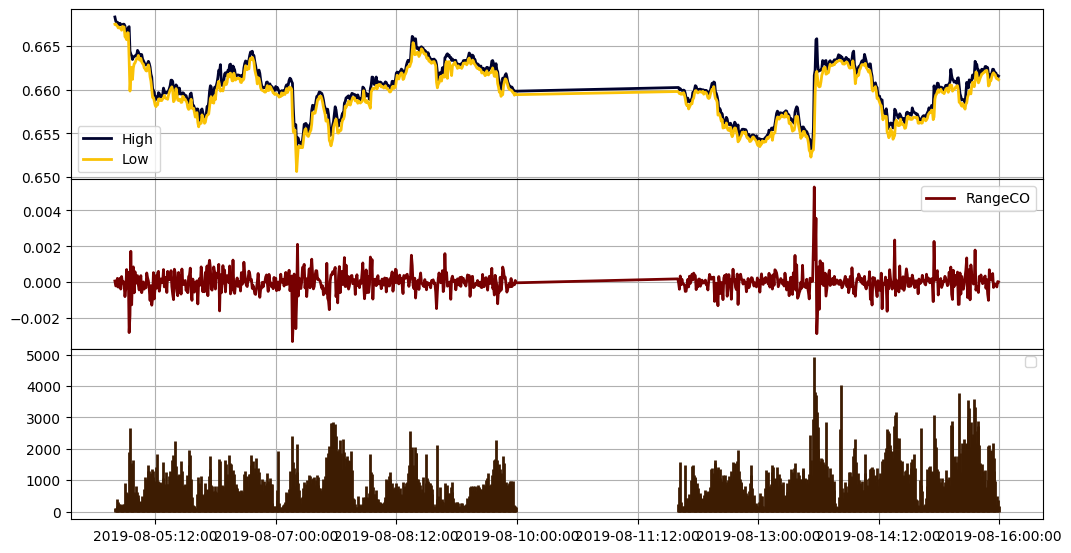

In [30]:
gl.init_figure()
n_rows, n_cols = 3,1
size_inches = [12, 6]
ax1 = gl.subplot2grid((n_rows,n_cols),(0,0))
ax2 = gl.subplot2grid((n_rows,n_cols),(1,0), sharex = ax1)
ax3 = gl.subplot2grid((n_rows,n_cols),(2,0), sharex = ax1)

velas.plot_series(axes = ax1, series_name = "High")
velas.plot_series(axes = ax1, series_name = "Low")
velas.plot_series(axes = ax2, series_name = "RangeCO")
velas.plot_series(axes = ax3, series_name = "Volume")

gl.subplots_adjust(left=.09, bottom=.10, right=.90, top=.95, wspace=.20, hspace=0, hide_xaxis = True)
gl.save_figure(img_path, dpi = 100, size_inches = size_inches, close = True)
Image(img_path)

### Indicators

We can also decide to plot the indicators:


In [31]:
velas.plot_indicator(axes = None, indicator_name = "SMA")
velas.plot_indicator(axes = None, indicator_name = "MOM")

## Intraday data manipulation

Usually, when we have intraday data (M1, M5, M15...) we would like to make specific processing to each day XXX.

Due to the gap between sessions, it is usually not a good idea to compute indicators at candlestic level (i.e. an MA over the M5 candlesticks). 



In [32]:
timestamps = velas.timestamps
market_hours = MarketHours()
special_trading_days_dict = market_hours.estimate_special_trading_days_from_timestamps(timestamps)
days_dict = MarketHours.get_index_by_days_dict(timestamps)

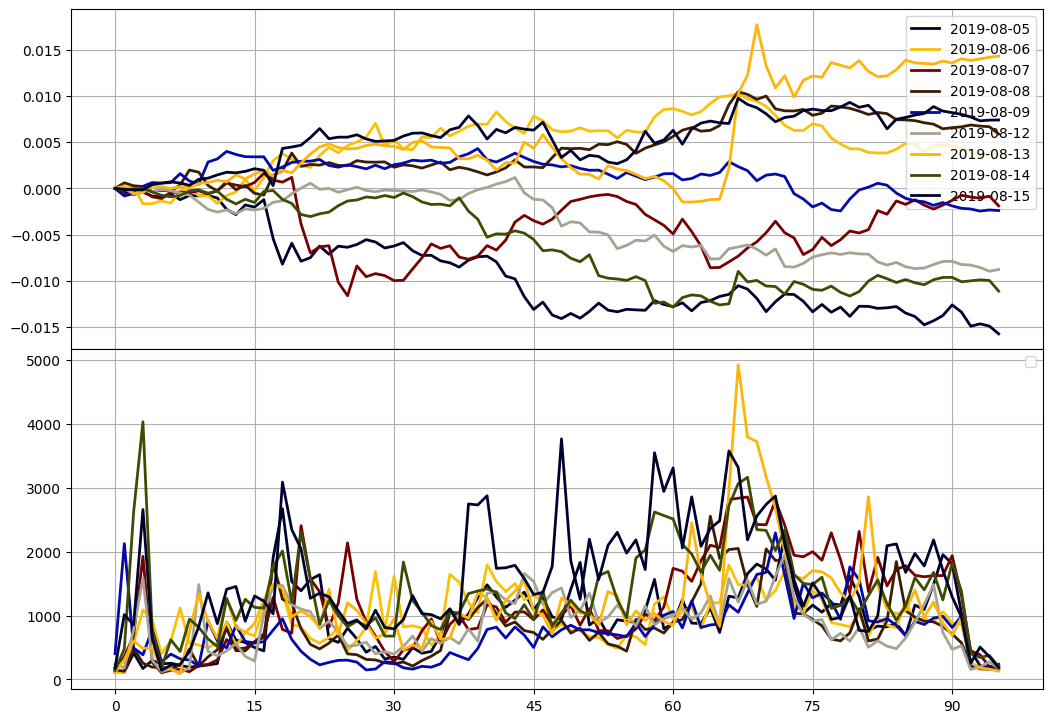

In [33]:
def change_date(date):
    date.__setattr__("year",0); date.month = 0; date.day = 0

gl.init_figure()
n_rows, n_cols = 2,1
size_inches = [12, 8]
ax1 = gl.subplot2grid((n_rows,n_cols),(0,0))
ax2 = gl.subplot2grid((n_rows,n_cols),(1,0), sharex = ax1)

for date in days_dict.keys():
    timestamps_date = days_dict[date]
    ## TODO: It is maybe easier to have the time as datetime with no Year,Month,Day
    # times_date = timestamps_date.map(change_date) #pd.Timestamp.time
    
    velas.set_time_interval(date,date)
    close_date = velas["Close"]
    close_date = (close_date - close_date[0])/close_date[0]
    
    volume_date = velas["Volume"]
    
    color = gl.get_color()
    gl.plot(range(close_date.size), close_date, axes = ax1, color = color, legend = [str(date)])
    gl.plot(range(volume_date.size), volume_date, axes = ax2, color = color)
    
gl.subplots_adjust(left=.09, bottom=.10, right=.90, top=.95, wspace=.20, hspace=0, hide_xaxis = True)
gl.save_figure(img_path, dpi = 100, size_inches = size_inches, close = True)
Image(img_path)